# Association Rule Mining 

Install "mlxtend" and "networkx"

In [2]:
#!pip install mlxtend

In [2]:
# !pip3 install networkx

Import required packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

Importing groceries file from folder

In [7]:
data = pd.read_csv('groceries.csv')
df = data.copy()
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [8]:
df.shape

(700, 1)

Making sure all items in lower case

In [9]:
df['Items'] = df['Items'].str.lower()

In [10]:
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


### Converting into List

<img src="grocery.jpg" width=65%>


In [18]:
#CONVERTING TO ARRAY FOR DOING ONE - HOT ENCODING
items = df['Items'].str.split(',').values 
type(items)

numpy.ndarray

In [19]:
items

array([list(['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']),
       list(['tropical fruit', 'yogurt', 'coffee']), list(['whole milk']),
       list(['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads']),
       list(['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']),
       list(['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner']),
       list(['rolls/buns']),
       list(['other vegetables', 'uht-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)']),
       list(['pot plants']), list(['whole milk', 'cereals']),
       list(['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate']),
       list(['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes']),
       list(['beef']), list(['frankfurter', 'rolls/buns', 'soda']),
       list(['chicken', 'tropical fruit']),
       list(['butter', 'sugar', 'fruit/vegetable juice', 'newspapers']),


In [20]:
items.shape

(700,)

In [21]:
items.tolist()

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'uht-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [22]:
items = items.tolist()
type(items)
items

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'uht-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

### Applying Transaction Encoding for Apriori Algorithm

<img src="https://i.imgur.com/mtimFxh.png" width=500, height=400>

In [23]:
# For One-Hot encoding
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(items)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False]])

In [24]:
len(te.columns_)

152

In [25]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,...,turkey,uht-milk,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
df.shape

(700, 152)

In [26]:
te = TransactionEncoder()
type(te)

mlxtend.preprocessing.transactionencoder.TransactionEncoder

### Applying Apriori algorithm

Applying Apriopri algorithm with minimum support 1%

In [27]:
# For Apriori Algorithm
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.010, use_colnames=True)
print(frequent_itemsets)

      support                                       itemsets
0    0.011429                                (baking powder)
1    0.060000                                         (beef)
2    0.040000                                      (berries)
3    0.031429                                    (beverages)
4    0.064286                                 (bottled beer)
..        ...                                            ...
309  0.012857  (root vegetables, tropical fruit, whole milk)
310  0.010000          (root vegetables, yogurt, whole milk)
311  0.011429                  (sausage, yogurt, whole milk)
312  0.011429                     (soda, yogurt, whole milk)
313  0.012857           (yogurt, tropical fruit, whole milk)

[314 rows x 2 columns]


Making rules using at least 50% confidence

In [28]:
# For Association Rules
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cereals),(whole milk),0.011429,0.251429,0.010000,0.875000,3.480114,0.007127,5.988571
1,(frankfurter),(rolls/buns),0.068571,0.218571,0.034286,0.500000,2.287582,0.019298,1.562857
2,(frozen dessert),(whole milk),0.014286,0.251429,0.011429,0.800000,3.181818,0.007837,3.742857
3,(ham),(whole milk),0.022857,0.251429,0.014286,0.625000,2.485795,0.008539,1.996190
4,(margarine),(whole milk),0.051429,0.251429,0.025714,0.500000,1.988636,0.012784,1.497143
5,(pip fruit),(whole milk),0.045714,0.251429,0.022857,0.500000,1.988636,0.011363,1.497143
6,(sliced cheese),(rolls/buns),0.024286,0.218571,0.014286,0.588235,2.691273,0.008978,1.897755
7,(waffles),(whole milk),0.025714,0.251429,0.012857,0.500000,1.988636,0.006392,1.497143
8,"(yogurt, curd)",(whole milk),0.024286,0.251429,0.014286,0.588235,2.339572,0.008180,1.817959
9,"(frankfurter, whole milk)",(rolls/buns),0.021429,0.218571,0.011429,0.533333,2.440087,0.006745,1.674490


In [32]:
rules.sort_values(['support','confidence','lift','conviction'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(frankfurter),(rolls/buns),0.068571,0.218571,0.034286,0.500000,2.287582,0.019298,1.562857
4,(margarine),(whole milk),0.051429,0.251429,0.025714,0.500000,1.988636,0.012784,1.497143
5,(pip fruit),(whole milk),0.045714,0.251429,0.022857,0.500000,1.988636,0.011363,1.497143
10,"(yogurt, fruit/vegetable juice)",(whole milk),0.017143,0.251429,0.014286,0.833333,3.314394,0.009976,4.491429
3,(ham),(whole milk),0.022857,0.251429,0.014286,0.625000,2.485795,0.008539,1.996190
6,(sliced cheese),(rolls/buns),0.024286,0.218571,0.014286,0.588235,2.691273,0.008978,1.897755
8,"(yogurt, curd)",(whole milk),0.024286,0.251429,0.014286,0.588235,2.339572,0.008180,1.817959
11,"(fruit/vegetable juice, whole milk)",(yogurt),0.025714,0.115714,0.014286,0.555556,4.801097,0.011310,1.989643
18,"(sausage, whole milk)",(rolls/buns),0.027143,0.218571,0.014286,0.526316,2.407981,0.008353,1.649683
12,"(margarine, rolls/buns)",(whole milk),0.017143,0.251429,0.012857,0.750000,2.982955,0.008547,2.994286


Checking comparison of Support, Confidence and Lift

In [29]:
rules['support'].values
rules.support.values

array([0.01      , 0.03428571, 0.01142857, 0.01428571, 0.02571429,
       0.02285714, 0.01428571, 0.01285714, 0.01428571, 0.01142857,
       0.01428571, 0.01428571, 0.01285714, 0.01285714, 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01428571, 0.01285714,
       0.01      , 0.01142857, 0.01285714])

In [35]:
support=rules.support.values
confidence=rules.confidence.values
lift=rules.lift.values
conviction=rules.conviction.values

D:\DTU\Jan break\Practice and Experiments\Dice_Analytics_DC-ML\week 08\Association Rule Mining\Association Rules\apriori_helper.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb=plt.colorbar(points)


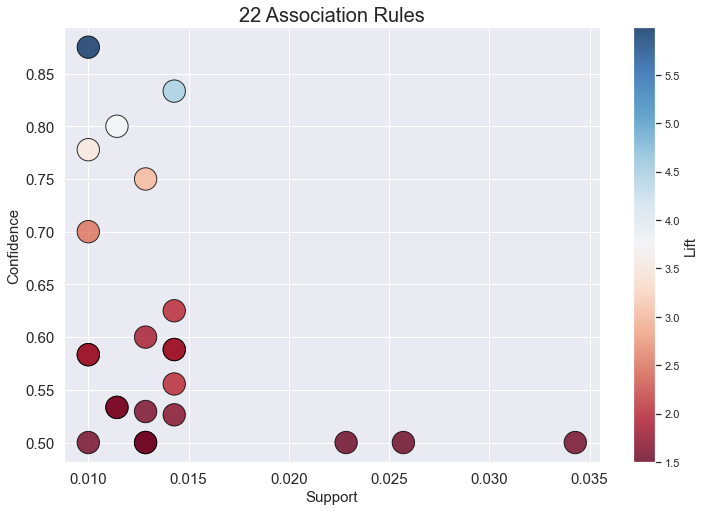

In [36]:
import apriori_helper as ap
ap.draw_plot(support,confidence,conviction)

### Network Graph

A network graph consists of "Node" for each event and "Edge" which defines relation which can be undirected, directed or wighted

<img src="network.png" width=45%><img src="social.png" width=45%>

**Network Graph Types**

<img src="https://www.ebi.ac.uk/training/online/sites/ebi.ac.uk.training.online/files/resize/Fig_edge_types-700x251.png">

<img src="network2.png" width=60%>

The function of plotting directed network graph for Association rules visualization is made in the helper file

Plotting network graph

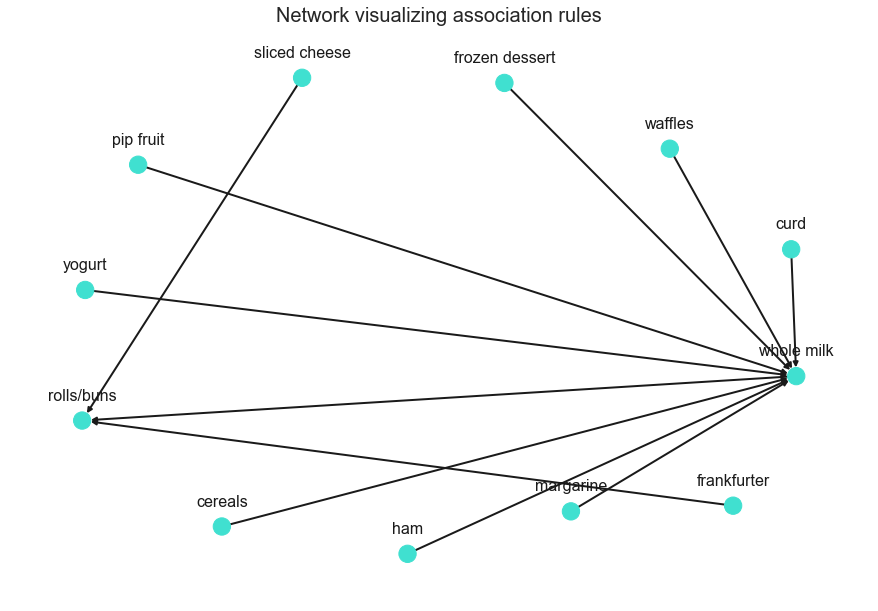

In [33]:
import networkx as nx
import apriori_helper as ap
ap.draw_graph(rules, 10)

In [34]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cereals),(whole milk),0.011429,0.251429,0.010000,0.875000,3.480114,0.007127,5.988571
1,(frankfurter),(rolls/buns),0.068571,0.218571,0.034286,0.500000,2.287582,0.019298,1.562857
2,(frozen dessert),(whole milk),0.014286,0.251429,0.011429,0.800000,3.181818,0.007837,3.742857
3,(ham),(whole milk),0.022857,0.251429,0.014286,0.625000,2.485795,0.008539,1.996190
4,(margarine),(whole milk),0.051429,0.251429,0.025714,0.500000,1.988636,0.012784,1.497143
5,(pip fruit),(whole milk),0.045714,0.251429,0.022857,0.500000,1.988636,0.011363,1.497143
6,(sliced cheese),(rolls/buns),0.024286,0.218571,0.014286,0.588235,2.691273,0.008978,1.897755
7,(waffles),(whole milk),0.025714,0.251429,0.012857,0.500000,1.988636,0.006392,1.497143
8,"(yogurt, curd)",(whole milk),0.024286,0.251429,0.014286,0.588235,2.339572,0.008180,1.817959
9,"(frankfurter, whole milk)",(rolls/buns),0.021429,0.218571,0.011429,0.533333,2.440087,0.006745,1.674490


In [38]:
#nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            